In [2]:
from pyrosm.data import sources
from pyrosm import get_data
from tqdm import tqdm
from pyrosm import OSM
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import sys

In [144]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
cities = ['Berlin', 'Paris', 'London', 'NewYorkCity', 'Seoul', \
          'Rostock', 'SanktPetersburg', 'Lima', 'Oslo', 'Prag']

In [39]:
available_cities = sources.cities.available
print(available_cities)

['Aachen', 'Aarhus', 'Adelaide', 'Albuquerque', 'Alexandria', 'Amsterdam', 'Antwerpen', 'Arnhem', 'Auckland', 'Augsburg', 'Austin', 'Baghdad', 'Baku', 'Balaton', 'Bamberg', 'Bangkok', 'Barcelona', 'Basel', 'Beijing', 'Beirut', 'Berkeley', 'Berlin', 'Bern', 'Bielefeld', 'Birmingham', 'Bochum', 'Bogota', 'Bombay', 'Bonn', 'Bordeaux', 'Boulder', 'BrandenburgHavel', 'Braunschweig', 'Bremen', 'Bremerhaven', 'Brisbane', 'Bristol', 'Brno', 'Bruegge', 'Bruessel', 'Budapest', 'BuenosAires', 'Cairo', 'Calgary', 'Cambridge', 'CambridgeMa', 'Canberra', 'CapeTown', 'Chemnitz', 'Chicago', 'ClermontFerrand', 'Colmar', 'Copenhagen', 'Cork', 'Corsica', 'Corvallis', 'Cottbus', 'Cracow', 'CraterLake', 'Curitiba', 'Cusco', 'Dallas', 'Darmstadt', 'Davis', 'DenHaag', 'Denver', 'Dessau', 'Dortmund', 'Dresden', 'Dublin', 'Duesseldorf', 'Duisburg', 'Edinburgh', 'Eindhoven', 'Emden', 'Erfurt', 'Erlangen', 'Eugene', 'Flensburg', 'FortCollins', 'Frankfurt', 'FrankfurtOder', 'Freiburg', 'Gdansk', 'Genf', 'Gent', '

In [40]:
for city in cities:
    if city in available_cities:
        print(f"{city} available")

Berlin available
Paris available
London available
NewYorkCity available
Seoul available
Rostock available
SanktPetersburg available
Lima available
Oslo available
Prag available


In [5]:
"""
for city in tqdm(cities):
    fp = get_data(city, directory="city_osm_data")
"""
fp = get_data("Flensburg", directory="city_osm_data")

In [104]:
print(fp)

/home/radtklau/Documents/Sentinel Building Segmentation/city_osm_data/Jena.osm.pbf


In [6]:
#filepath = "city_osm_data/Lima.osm.pbf"
osm = OSM(fp)

In [108]:
print(dir(osm))
print(osm.conf)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_current_timestamp', '_data_bounding_box', '_get_network_filter', '_get_pbf_elements', '_node_coordinates', '_nodes', '_nodes_gdf', '_osh_file', '_read_pbf', '_relations', '_set_current_time', '_timestamp_changed', '_verbose', '_way_records', 'allowed_bbox_types', 'bounding_box', 'conf', 'file_size', 'filepath', 'get_boundaries', 'get_buildings', 'get_data_by_custom_criteria', 'get_landuse', 'get_natural', 'get_network', 'get_pois', 'keep_node_info', 'to_graph']
<class 'pyrosm.config.Conf'>


In [119]:
buildings = osm.get_buildings()

In [7]:
boundaries = osm.get_boundaries()

In [98]:
b2 = osm.get_boundaries(name="Flensburg - Flensborg")

In [81]:
for index,row in b2.iterrows():
    print(row["geometry"].area)
    print(row["name"])

0.16269304459270476
Schleswig-Flensburg
0.007925538997369586
Flensburg - Flensborg
7.708639168413356e-05
Sender Flensburg-Jürgensby
0.00010992826537403744
Stützpunkt Flensburg-Mürwik


In [99]:
print(b2.iloc[0]["tags"])

{"alt_name:fo":"Flensburg","alt_name:ia":"Flensburgo","alt_name:is":"Flensburg","alt_name:ja":"\u30D5\u30EC\u30F3\u30B9\u30DC\u30FC","alt_name:la":"Flenopolis","coat_of_arms":"File:DEU Flensburg COA.svg","de:amtlicher_gemeindeschluessel":"01001000","de:place":"city","de:regionalschluessel":"010010000000","flag":"File:Flagge Flensburg.svg","int_name":"Flensburg","license_plate_code":"FL","name:ace":"Flensburg","name:af":"Flensburg","name:an":"Flensburg","name:ar":"\u0641\u0644\u0640\u0650\u0640\u0640\u0646\u0633\u0628\u0648\u0631\u063A","name:arc":"\u0726\u0720\u0722\u0723\u0712\u0718\u072A\u0713","name:az":"Flensburq","name:azb":"\u0641\u0644\u0646\u0633\u0628\u0648\u0631\u0642","name:be":"\u0424\u043B\u0435\u0301\u043D\u0441\u0431\u0443\u0440\u0433","name:bg":"\u0424\u043B\u0435\u043D\u0441\u0431\u0443\u0440\u0433","name:bn":"\u09AB\u09CD\u09B2\u09C7\u09A8\u09CD\u09B8\u09AC\u09C1\u09B0\u09CD\u0997","name:br":"Flensburg","name:ca":"Flensburg","name:ce":"\u0424\u043B\u0435\u043D\u0441\u

In [78]:
b2['name'].unique()

array(['Flensburg - Flensborg'], dtype=object)

In [56]:
print(b2.iloc[0]["name"])
print(b2.iloc[0]["geometry"].area)

Schleswig-Flensburg
0.16269304459270476


<Axes: >

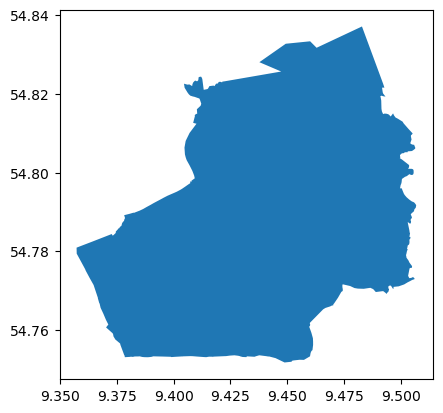

In [100]:
b2.plot()

In [20]:
b2['name'].unique()

array(['Schleswig-Flensburg', 'Flensburg - Flensborg',
       'Sender Flensburg-Jürgensby', 'Stützpunkt Flensburg-Mürwik'],
      dtype=object)

In [110]:
print(type(buildings))
print(dir(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__geo_interface__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__

In [111]:
buildings.to_file("Jena.shp", driver="GeoJSON")
bs = geopandas.read_file("Jena.shp")

<Axes: >

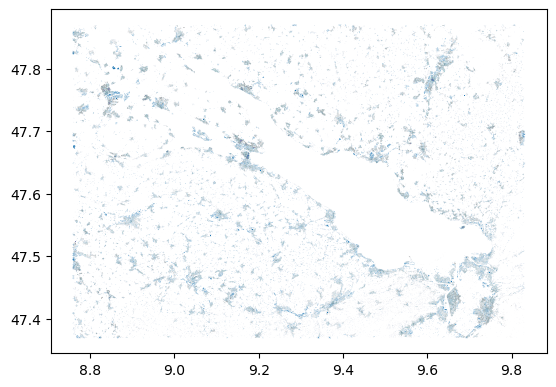

In [120]:
buildings.plot()

<Axes: >

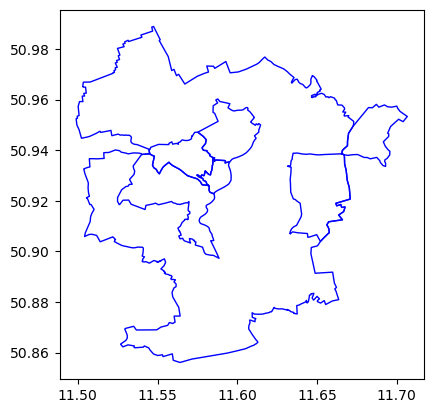

In [197]:
boundaries.plot(facecolor="none", edgecolor="blue")

In [8]:
boundaries.shape

boundaries_city = boundaries[boundaries['name']=="Flensburg - Flensborg"]
print("x")

x


In [9]:
boundary_coords = np.array(boundaries_city["geometry"].iloc[0].exterior.coords)
print(boundary_coords)

[[ 9.3586216  54.78123474]
 [ 9.3640976  54.782444  ]
 [ 9.37226009 54.78427887]
 ...
 [ 9.35735798 54.77941895]
 [ 9.3572979  54.78093719]
 [ 9.3586216  54.78123474]]


In [193]:
max_longitude_index = np.argmax(boundary_coords[:, 0])
max_longitude_point = boundary_coords[max_longitude_index]

# Find the point with the lowest longitude
min_longitude_index = np.argmin(boundary_coords[:, 0])
min_longitude_point = boundary_coords[min_longitude_index]

# Find the point with the highest latitude
max_latitude_index = np.argmax(boundary_coords[:, 1])
max_latitude_point = boundary_coords[max_latitude_index]

# Find the point with the lowest latitude
min_latitude_index = np.argmin(boundary_coords[:, 1])
min_latitude_point = boundary_coords[min_latitude_index]

print(f"max long: {max_longitude_point}, min long: {min_longitude_point}, max lat: {max_latitude_point}, min lat: {min_latitude_point}")

max long: [11.67299175 50.95140839], min long: [11.49895859 50.9524231 ], max lat: [11.54750729 50.98889923], min lat: [11.56408691 50.85607529]


Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

Text(0.5, 1.0, 'Scatter Plot of Coordinates with Extremes Highlighted')

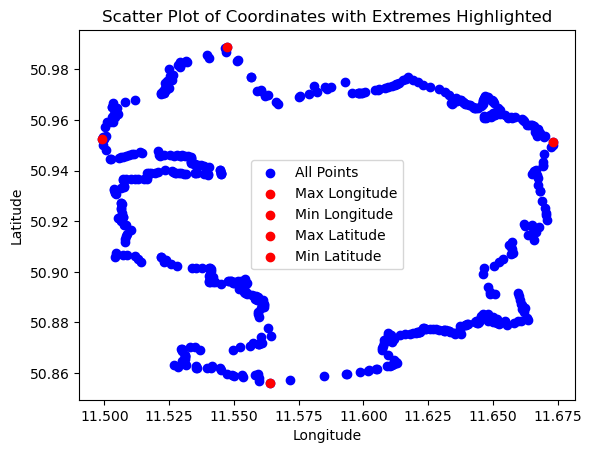

In [189]:
plt.scatter(boundary_coords[:, 0], boundary_coords[:, 1], label='All Points', color='blue')

# Highlight the points with the highest and lowest longitude and latitude in red
plt.scatter(max_longitude_point[0], max_longitude_point[1], color='red', label='Max Longitude')
plt.scatter(min_longitude_point[0], min_longitude_point[1], color='red', label='Min Longitude')
plt.scatter(max_latitude_point[0], max_latitude_point[1], color='red', label='Max Latitude')
plt.scatter(min_latitude_point[0], min_latitude_point[1], color='red', label='Min Latitude')

# Add labels and title for better understanding
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Coordinates with Extremes Highlighted')
plt.legend()

# Display the plot
plt.show()

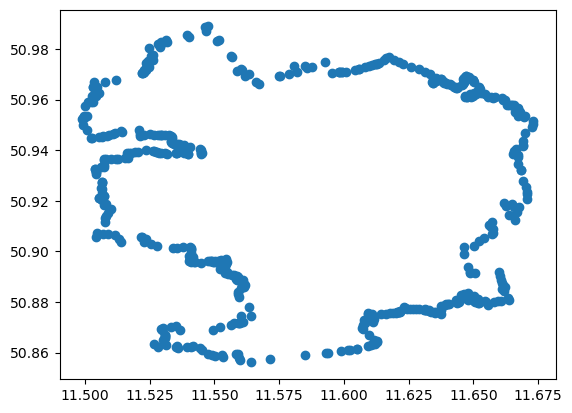

In [190]:
x_coords, y_coords = zip(*boundary_coords)
plt.scatter(x_coords,y_coords)

In [202]:
print(boundaries_city.columns)

Index(['visible', 'admin_level', 'boundary', 'id', 'timestamp', 'version',
       'geometry', 'tags', 'osm_type', 'name', 'ref', 'website', 'border_type',
       'changeset'],
      dtype='object')


<Axes: >

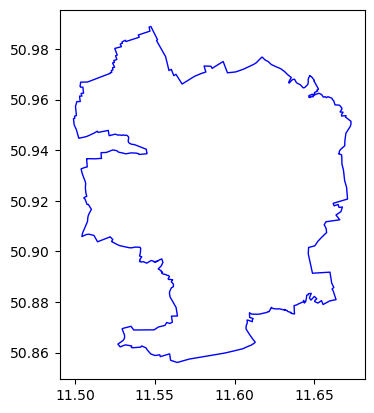

In [203]:
boundaries_city.plot(facecolor="none", edgecolor="blue")

In [210]:
print(boundaries_city['geometry'].values[0])

POLYGON ((11.50306224822998 50.96495819091797, 11.503459930419922 50.966888427734375, 11.507770538330078 50.966941833496094, 11.511846542358398 50.96792221069336, 11.521980285644531 50.97037124633789, 11.521944999694824 50.970550537109375, 11.522418022155762 50.97067642211914, 11.522990226745605 50.97077178955078, 11.522951126098633 50.97084045410156, 11.522706031799316 50.97148895263672, 11.5228910446167 50.97153854370117, 11.523674011230469 50.97175598144531, 11.523502349853516 50.97261428833008, 11.52474308013916 50.9727783203125, 11.52408504486084 50.97367477416992, 11.523502349853516 50.97447967529297, 11.524713516235352 50.97470474243164, 11.524243354797363 50.97542953491211, 11.52615737915039 50.975830078125, 11.525385856628418 50.97732925415039, 11.526397705078125 50.97761535644531, 11.524860382080078 50.980224609375, 11.529027938842773 50.98091125488281, 11.528279304504395 50.9819450378418, 11.529654502868652 50.98228073120117, 11.529367446899414 50.982784271240234, 11.5314970

In [10]:
osm_bd = OSM(fp, bounding_box=boundaries_city['geometry'].values[0])

In [11]:
bbox_buildings = osm_bd.get_buildings()

<Axes: >

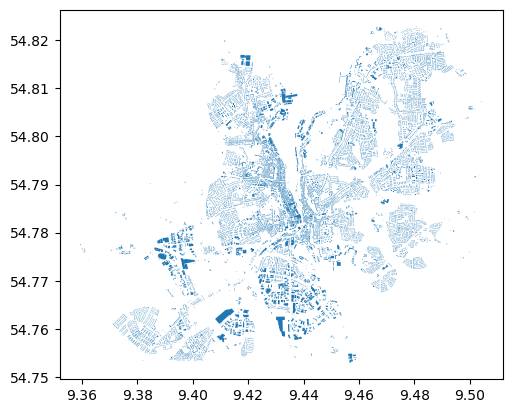

In [12]:
bbox_buildings.plot()
#now i need satellite data

In [14]:
print(type(bbox_buildings))
print(bbox_buildings.columns)
print(sys.getsizeof(bbox_buildings))
polygon_building_data = bbox_buildings["geometry"]
print(type(polygon_building_data))
print(sys.getsizeof(polygon_building_data))
print(polygon_building_data)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:housename',
       'addr:postcode', 'addr:place', 'addr:street', 'email', 'name',
       'opening_hours', 'operator', 'phone', 'ref', 'url', 'visible',
       'website', 'building', 'amenity', 'building:flats', 'building:levels',
       'building:material', 'craft', 'height', 'internet_access', 'office',
       'shop', 'source', 'start_date', 'wikipedia', 'id', 'timestamp',
       'version', 'tags', 'osm_type', 'geometry', 'changeset'],
      dtype='object')
31052316
<class 'geopandas.geoseries.GeoSeries'>
263428
0        POLYGON ((9.43008 54.76252, 9.43322 54.76253, ...
1        POLYGON ((9.45528 54.77608, 9.45464 54.77548, ...
2        POLYGON ((9.45204 54.77389, 9.45194 54.77389, ...
3        POLYGON ((9.43471 54.75836, 9.43466 54.75834, ...
4        POLYGON ((9.43439 54.76096, 9.43477 54.76096, ...
                               ...                        
32903    POLYGON ((

In [48]:
print(bbox_buildings.iloc[0]["wikipedia"])

None


In [100]:
ind = 0

In [53]:
import rasterio.features
from shapely.geometry import Polygon
from pyproj import Transformer
import geopandas as gpd

POLYGON ((9.430079460144043 54.762516021728516, 9.433220863342285 54.76252746582031, 9.433228492736816 54.7618293762207, 9.4324369430542 54.7618293762207, 9.432439804077148 54.761741638183594, 9.432467460632324 54.76093673706055, 9.432493209838867 54.76014709472656, 9.432515144348145 54.75948715209961, 9.433099746704102 54.75948715209961, 9.433293342590332 54.75938415527344, 9.433320045471191 54.758399963378906, 9.432574272155762 54.75839614868164, 9.432577133178711 54.75849533081055, 9.432214736938477 54.75849914550781, 9.432220458984375 54.759010314941406, 9.431967735290527 54.759010314941406, 9.431951522827148 54.75946044921875, 9.431458473205566 54.75946044921875, 9.43140983581543 54.760032653808594, 9.431174278259277 54.76002883911133, 9.431147575378418 54.76070785522461, 9.43090534210205 54.760704040527344, 9.430865287780762 54.76148986816406, 9.430621147155762 54.76148986816406, 9.430586814880371 54.76182556152344, 9.430109024047852 54.76182556152344, 9.430079460144043 54.762516

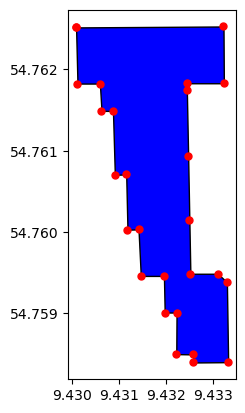

In [101]:
polygon = polygon_building_data.iloc[ind]  # Assuming polygon_building_data is a GeoDataFrame

# Extracting x and y coordinates of the polygon vertices
x_coords, y_coords = polygon.exterior.xy

fig, ax = plt.subplots()

polygon_building_data[ind:ind+1].plot(ax=ax, color='blue', edgecolor='black')
ax.plot(x_coords, y_coords, 'ro', markersize=5)
print(polygon_building_data.iloc[ind])

#ax.set_aspect('equal')

plt.show()

In [107]:
geographic_crs = 'EPSG:4326'
utm_crs = 'EPSG:32632'
transformer = Transformer.from_crs(geographic_crs, utm_crs, always_xy=True)
utm_x, utm_y = transformer.transform(x_coords, y_coords)

utm_x = np.array(utm_x)
utm_y = np.array(utm_y)

max_x = np.max(utm_x)
max_y = np.max(utm_y)
min_x = np.min(utm_x)
min_y = np.min(utm_y)

utm_x = ((utm_x - min_x) / (max_x - min_x)) * 100
utm_y = ((utm_y - min_y) / (max_y - min_y)) * 100

utm_x = utm_x.astype(int)
utm_y = utm_y.astype(int)

coords = [(x, y) for x, y in zip(utm_x, utm_y)]

# Create a Shapely polygon from the coordinates
po = Polygon(coords)
print(po)
ge = gpd.GeoSeries([polygon])

POLYGON ((0 99, 95 100, 96 83, 71 83, 72 80, 73 61, 74 42, 75 26, 92 26, 98 23, 100 0, 77 0, 77 2, 66 2, 66 14, 58 14, 57 25, 42 25, 41 39, 34 39, 33 55, 25 55, 24 74, 16 74, 15 82, 1 82, 0 99))


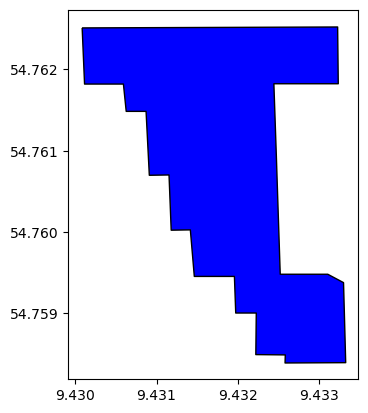

In [108]:
fig, ax = plt.subplots()
polygon_building_data[ind:ind+1].plot(ax=ax, color='blue', edgecolor='black')
ax.set_aspect('equal')
plt.show()

<class 'numpy.ndarray'>


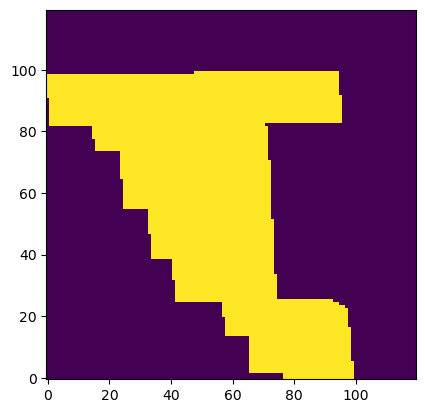

In [106]:
poly = Polygon([(0, 50), (10, 10), (30, 0), (45, 45), (0, 50)])
img = rasterio.features.rasterize([po], out_shape=(120,120))
print(type(img))
plt.imshow(img, origin="lower")

In [39]:
poly.plot(ax=ax, color='blue', edgecolor='black')
ax.set_aspect('equal')

plt.show()


AttributeError: 'Polygon' object has no attribute 'plot'

In [111]:
from geopy.distance import geodesic

point1 = (51.74459457397401, 7.674769878387451)
point2 = (51.66939926147461, 7.9031748777166748)

# Calculate the geodesic distance
distance = geodesic(point1, point2).meters
print(distance)

17868.289506426783


In [123]:
max_lat_point = [7.826183319091797,     51.74459457397461     ]
max_lon_point = [     7.997435092926025    , 51.67427444458008]
min_lat_point = [7.827110767364502,     51.578636169433594    ]
min_lon_point = [     7.674769878387451    , 51.6592903137207]

im_corners = [min_lon_point[0], min_lat_point[1], max_lon_point[0], max_lat_point[1]]
print(im_corners)

[7.674769878387451, 51.578636169433594, 7.997435092926025, 51.74459457397461]


In [112]:
utm_crs = 'EPSG:32632'
geographic_crs = 'EPSG:4326'
transformer = Transformer.from_crs(geographic_crs, utm_crs, always_xy=True)

In [127]:
utm_min_x, utm_max_y = transformer.transform(min_lon_point[0], max_lat_point[1])

print(utm_min_x, utm_max_y)

408507.28444902354 5733462.858864962


In [125]:
utm_min_x, utm_min_y = transformer.transform(min_lon_point[0], min_lat_point[1])
utm_max_x, utm_max_y = transformer.transform(max_lon_point[0], max_lat_point[1])

print(min_lon_point[0], max_lat_point[1])
print(utm_min_x, utm_max_y)

7.674769878387451 51.74459457397461
408172.39332405454 5733107.472321266


In [131]:
utm_min_x, utm_min_y = transformer.transform(im_corners[0], im_corners[1])
utm_max_x, utm_max_y = transformer.transform(im_corners[0], im_corners[3])

print(im_corners[0], im_corners[3])
print(utm_min_x, utm_max_y)

7.674769878387451 51.74459457397461
408172.39332405454 5733462.858864962


In [128]:
utm_min_x, utm_max_y = transformer.transform(7.669921, 51.74454)

print(utm_min_x, utm_max_y)

408172.4254691295 5733462.881800072
